# Problem 1

## 1.1 Define the problem and perform Exploratory Data Analysis

### 1.1.1 Problem definition

In [1]:
!pip install xgboost 

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from scipy.stats import zscore

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



### 1.1.2 Loading the Dataset

In [3]:
df=pd.read_excel('Data.xlsx')

In [4]:
df1=df.copy()
df2=df1.copy()

In [5]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
# The dataset is loaded properly

### 1.1.3 Check shape

In [7]:
print("The no. of rows is ",    df.shape[0])
print("The no. of columns is", df.shape[1])

The no. of rows is  1525
The no. of columns is 10


### 1.1.4 Data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [9]:
# The variables vote and gender are object type and other variables are int
# The two object variables can be encoded to numeric variables
# There are no null values

### 1.1.5 Statistical summary

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [11]:
# All the variables expect Blair are almost normally distributed (Mean almost eqaul to Median)
# The age variable has outliers
# The median age is 53 as the voters are older age people

In [12]:
df.describe(include='object').T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [13]:
# Almost 70% of the voters are Labour party and independent variable is skewed towards one party
# SMOTE technique need to be used to balance the data before modeling

In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)

### 1.1.6 Univariate analysis

#### 1.1.6.1 Numerical Variable

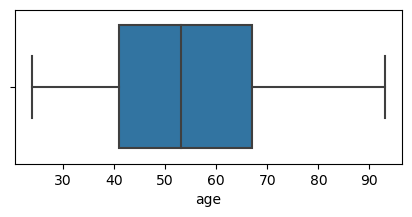

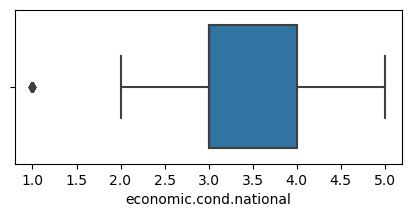

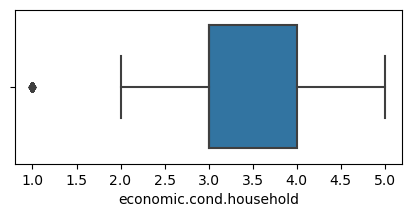

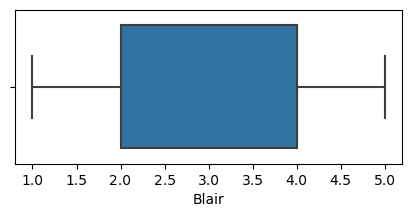

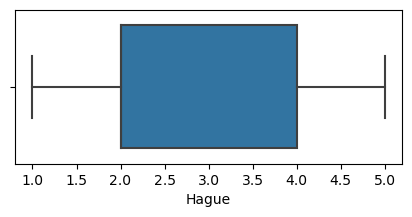

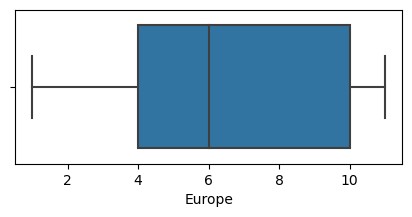

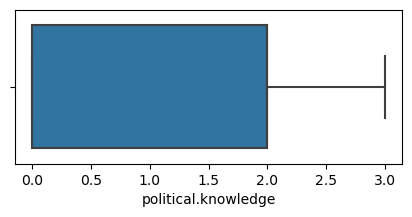

In [15]:
num=['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']
for i in num:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df,x=i);


In [16]:
# Expect variables 'economic.cond.national' and 'economic.cond.household' all the other variables does not have a outlier
# Variable political knowlegde does not have lower limit - as there are people with 0 political knowlegde
# Variables 'economic.cond.national','economic.cond.household', 'Blair' and 'Hauge' have the median and 25% as similar values
# Variable Europe Mean is greater than median which is right/positively skewed

#### 1.1.6.2 Categorical Variable

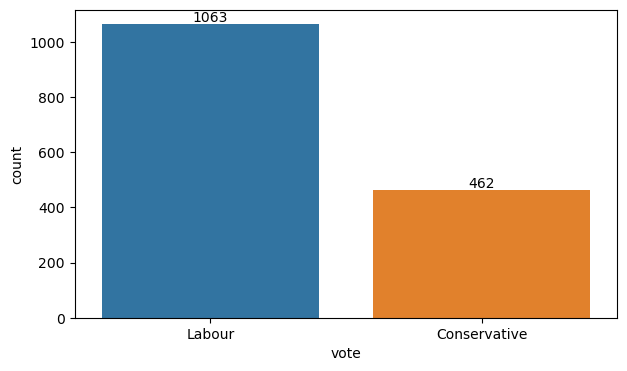

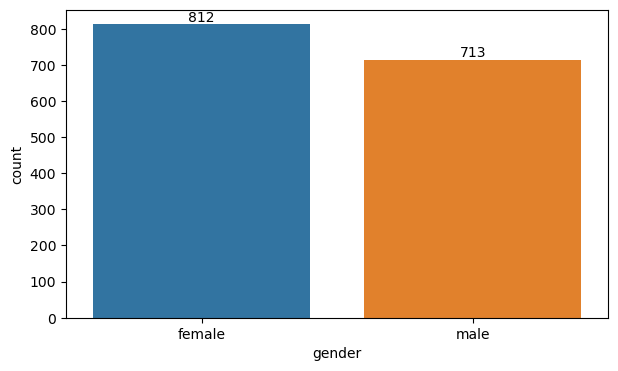

In [17]:
cat=['vote','gender']
for i in cat:
    plt.figure(figsize=(7,4))
    a=sns.countplot(data=df,x=i);
    plt.bar_label(a.containers[0]);

In [18]:
# The labour party voters are higher upto 70%
# Gender ratio is almost the same

### 1.1.7 Multivariate analysis

#### 1.1.7.1 Numerical (all) vs Categorical (Vote)

<Figure size 1200x700 with 0 Axes>

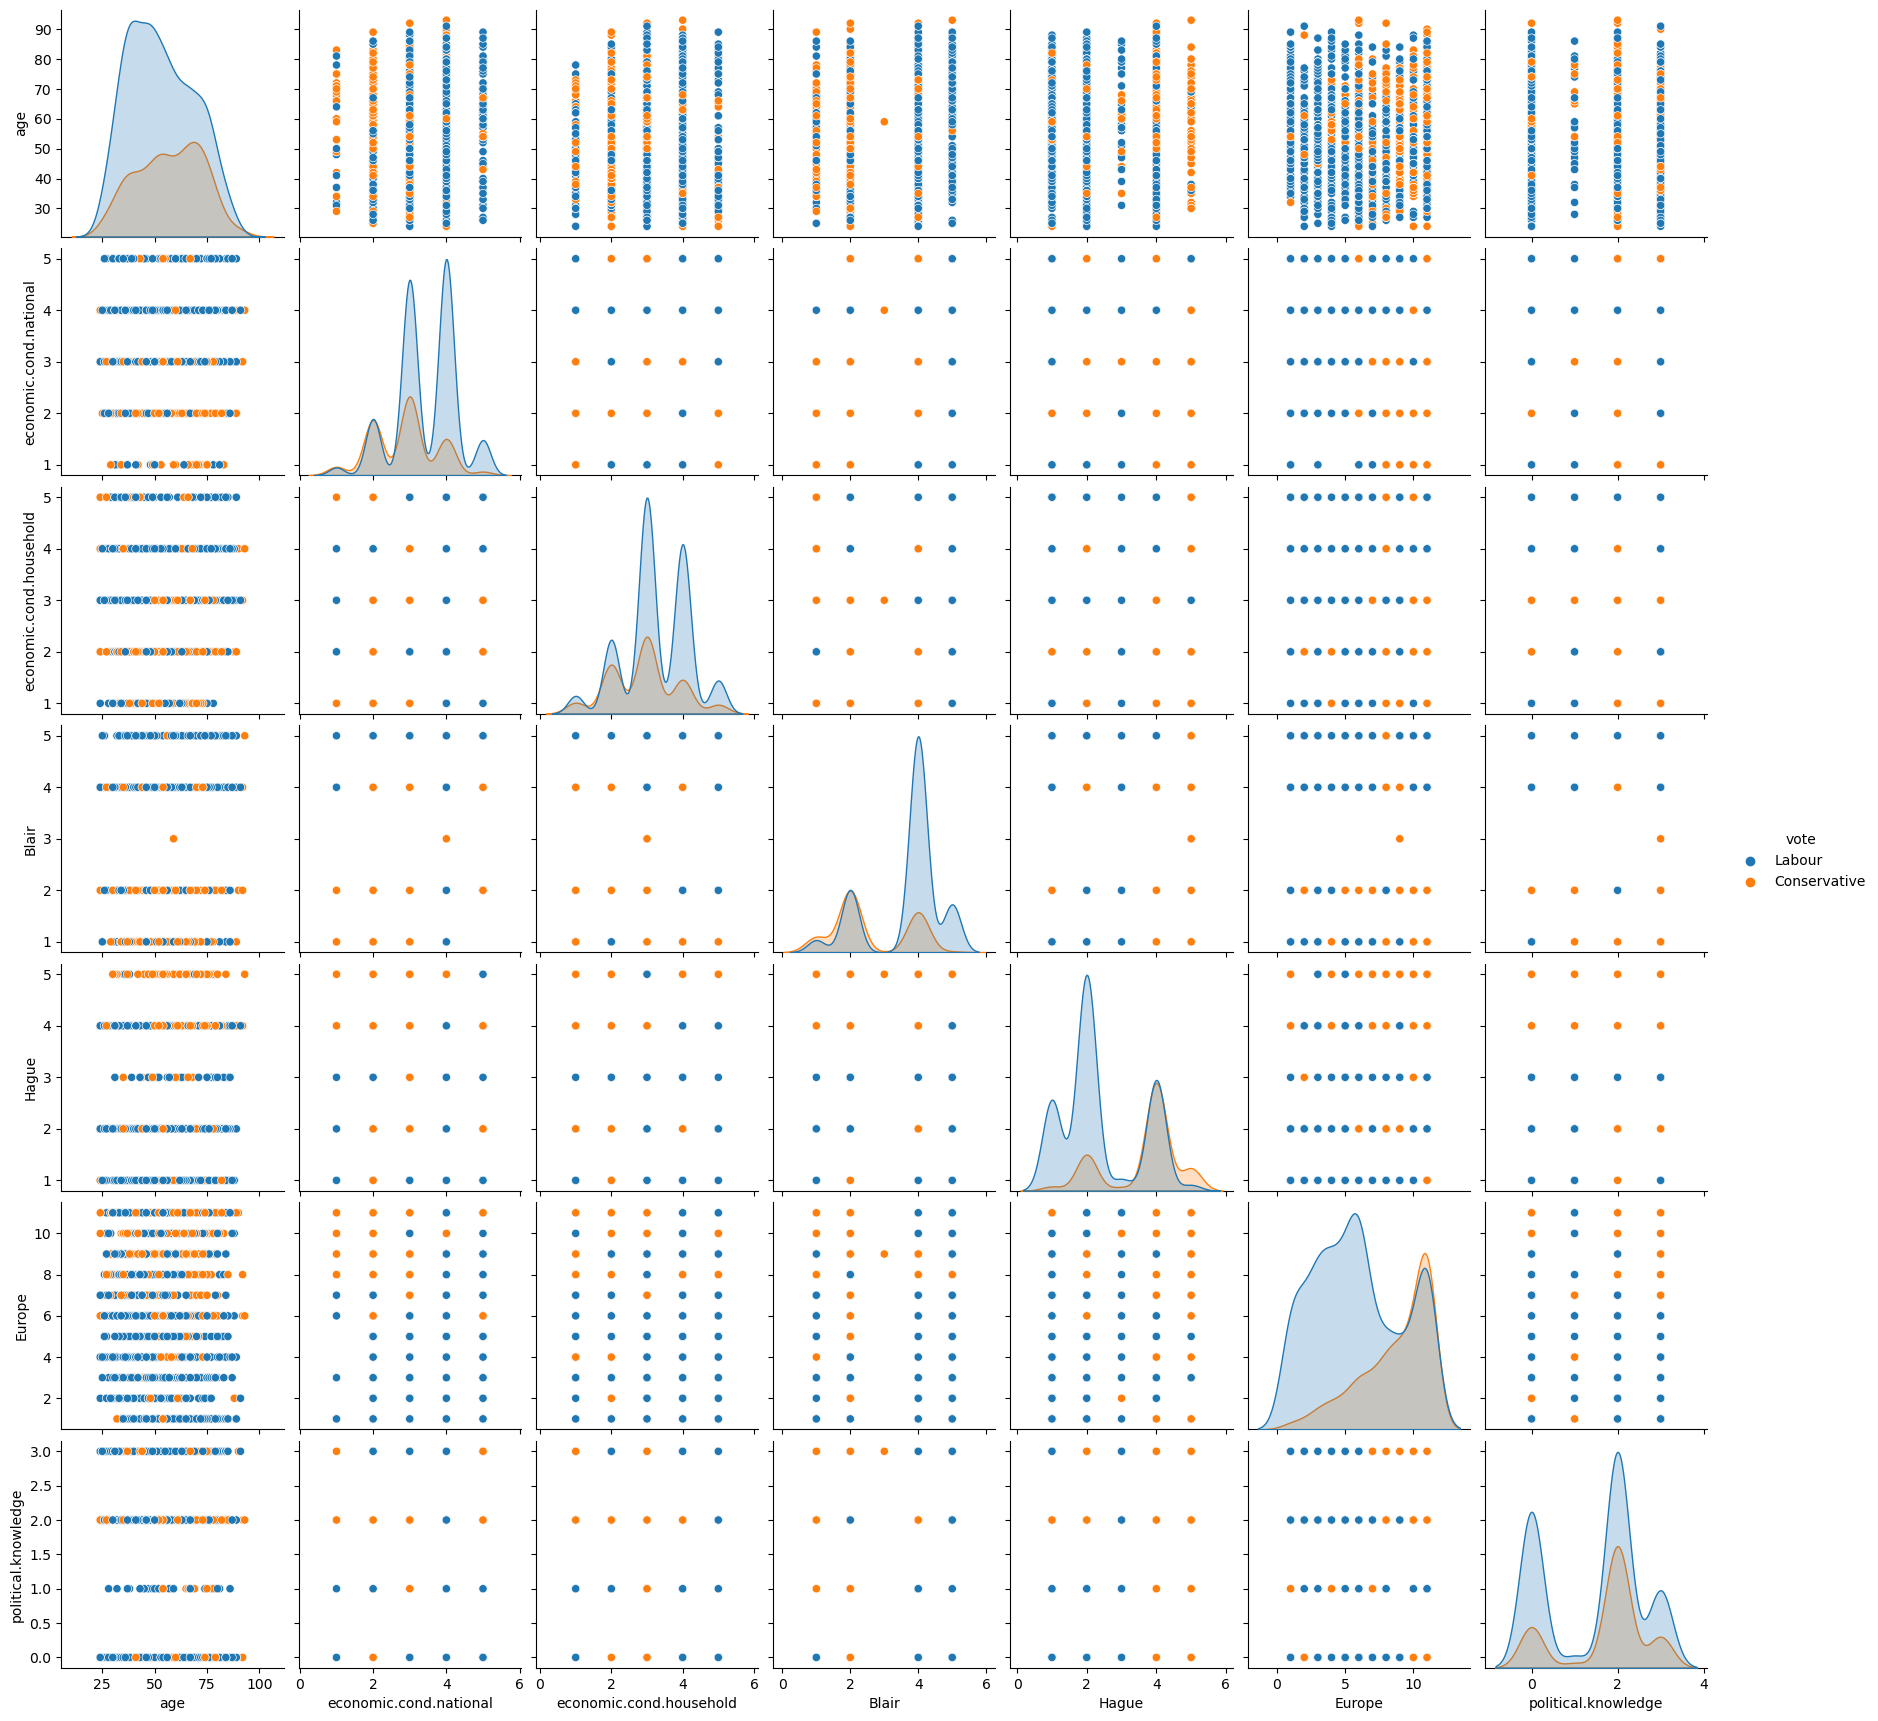

In [19]:
plt.figure(figsize=(12,7))
sns.pairplot(data=df, hue='vote');

#### 1.1.7.1 Numerical (all) vs Categorical (Gender)

<Figure size 1200x700 with 0 Axes>

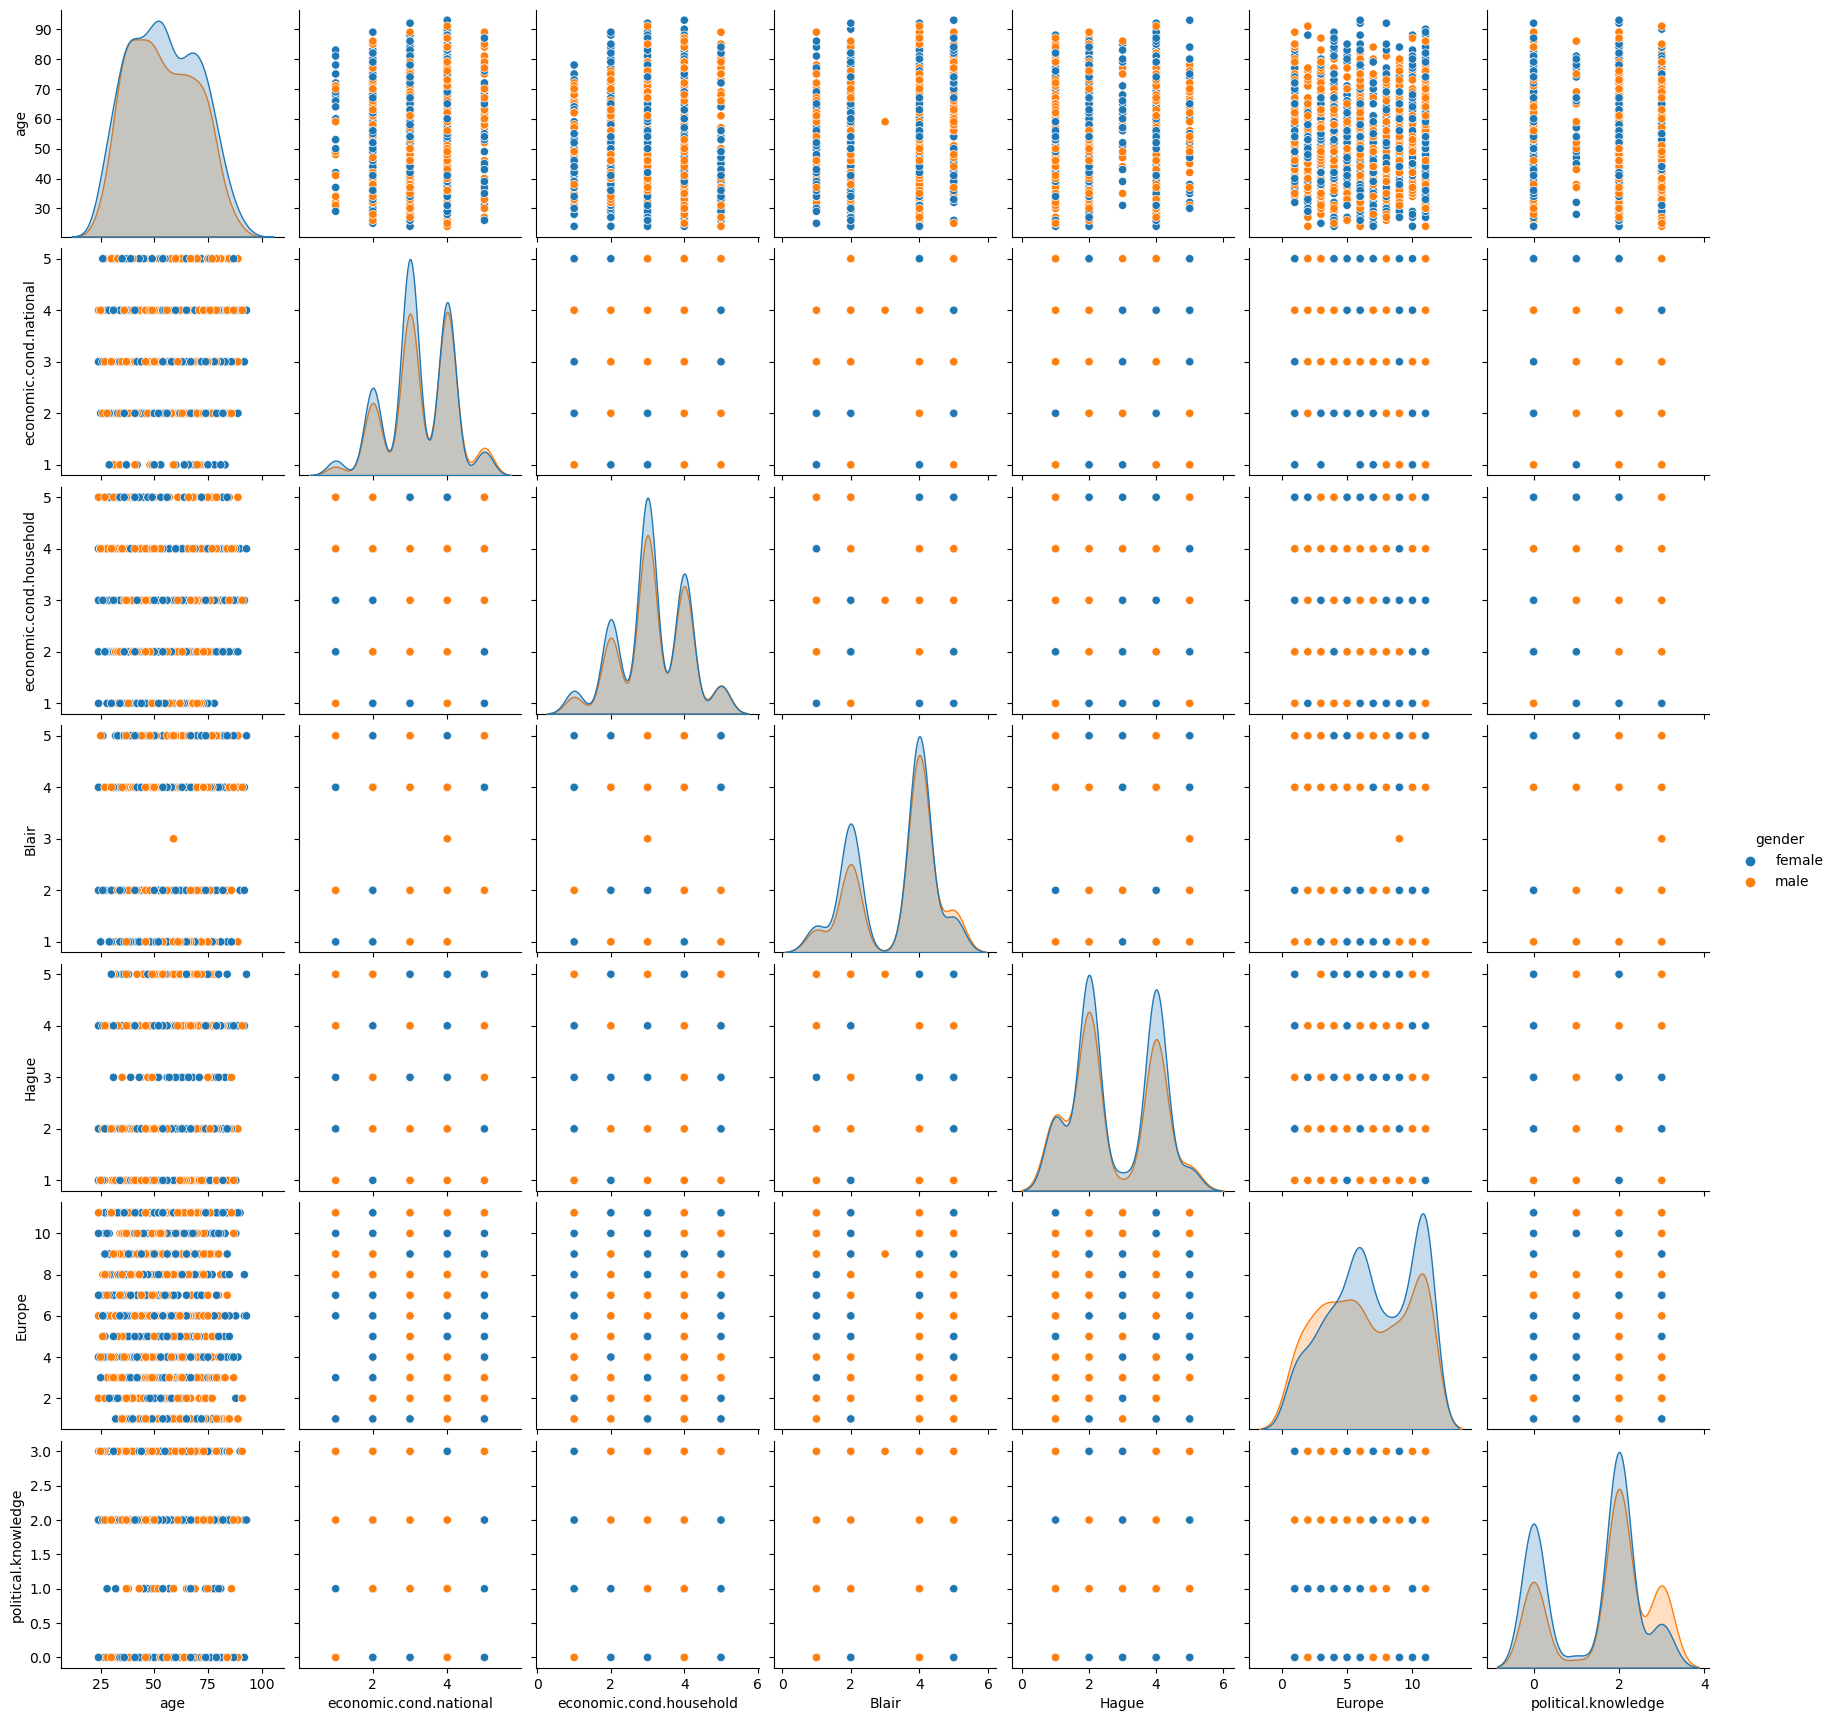

In [20]:
plt.figure(figsize=(12,7))
sns.pairplot(data=df,hue='gender');

### 1.1.8 Patterns and insights - Key meaningful observations on individual 

## 1.2 Data Pre-processing

### 1.2.1 Outlier Detection(treat, if needed)

#### 1.2.1.1 Before Outlier Treatment

In [21]:
df_num=df.select_dtypes(include=['int64','float64'])
list_df_num=list(df_num)
list_df_num

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

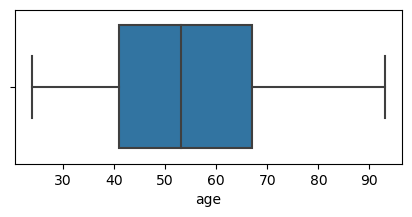

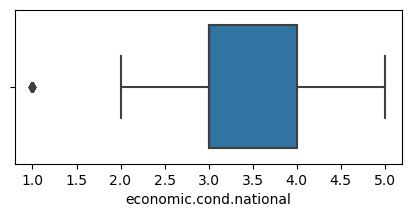

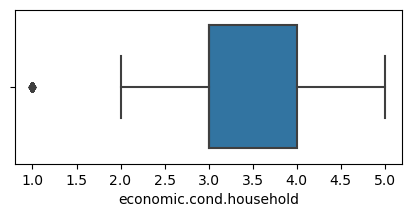

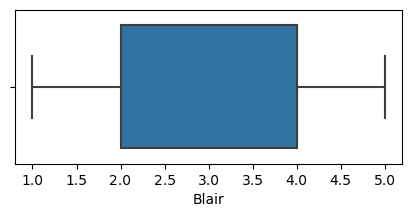

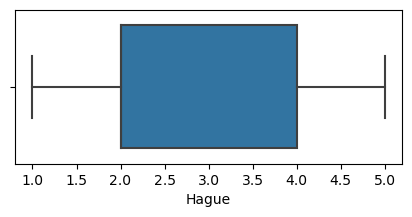

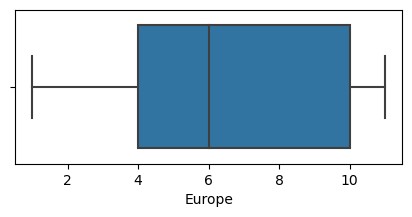

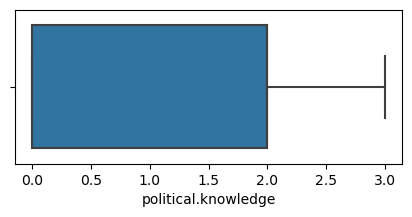

In [22]:
for i in df_num:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df,x=i);

In [23]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    LowerLimit=Q1-(1.5*IQR)
    UpperLimit=Q3+(1.5*IQR)
    return LowerLimit,UpperLimit

In [24]:
for i in df_num.columns:
    lr,ur=remove_outlier(df[i])
    df[i]=np.where(df[i]>ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])

#### 1.2.1.2 After Outlier Treatment

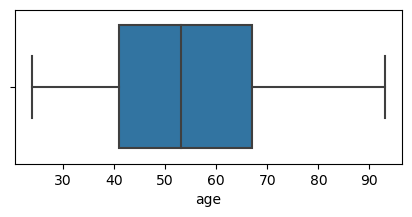

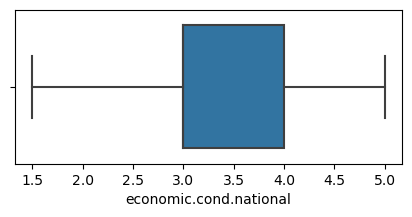

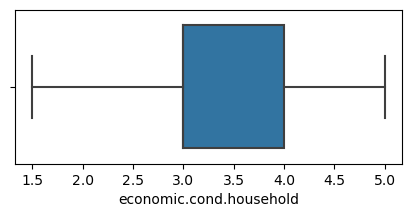

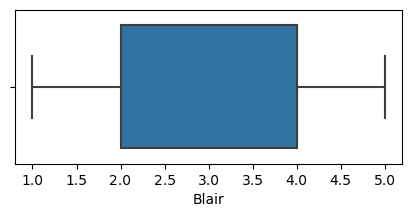

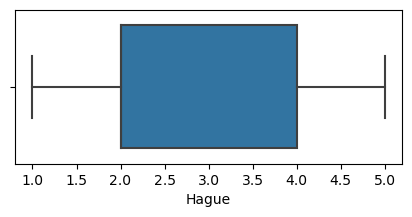

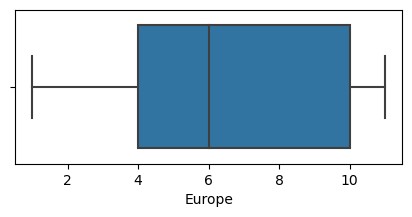

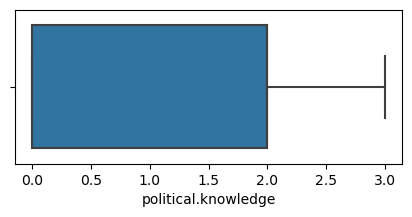

In [25]:
for i in df_num:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df,x=i);

### 1.2.2 Encode the data

In [26]:
# The object variables are encode to 0 & 1 with the datatype as categorical 

In [27]:
for i in df.columns: 
    if df[i].dtype == 'object': 
        df[i] = pd.Categorical(df[i]).codes

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1525 non-null   int8   
 1   age                      1525 non-null   float64
 2   economic.cond.national   1525 non-null   float64
 3   economic.cond.household  1525 non-null   float64
 4   Blair                    1525 non-null   float64
 5   Hague                    1525 non-null   float64
 6   Europe                   1525 non-null   float64
 7   political.knowledge      1525 non-null   float64
 8   gender                   1525 non-null   int8   
dtypes: float64(7), int8(2)
memory usage: 86.5 KB


In [29]:
df.vote.value_counts()

1    1063
0     462
Name: vote, dtype: int64

In [30]:
df.gender.value_counts()

0    812
1    713
Name: gender, dtype: int64

### 1.2.3 Data split

In [31]:
X=df.drop('vote',axis=1)
Y=df.pop('vote')

In [32]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


In [33]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int8

### 1.2.4 Scale the data (and state your reasons for scaling the features)

In [34]:
# The variables age and Europe is not in the same scale of other variables. So, scaling data will ensure all the variables are in the same range.

In [35]:
X_scaled=X.apply(zscore)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,1.013397e-16,1.000328,-1.921698,-0.839313,-0.075276,0.816100,2.471512
economic.cond.national,1525.0,8.386734e-17,1.000328,-2.061826,-0.302622,-0.302622,0.870182,2.042985
economic.cond.household,1525.0,-1.258010e-16,1.000328,-1.877568,-0.182644,-0.182644,0.947305,2.077254
Blair,1525.0,1.677347e-16,1.000328,-1.987695,-1.136225,0.566716,0.566716,1.418187
Hague,1525.0,1.164824e-17,1.000328,-1.419886,-0.607076,-0.607076,1.018544,1.831354
Europe,1525.0,-1.327900e-16,1.000328,-1.737782,-0.827714,-0.221002,0.992422,1.295778
political.knowledge,1525.0,-8.153769e-17,1.000328,-1.424148,-1.424148,0.422643,0.422643,1.346038
gender,1525.0,-5.125226e-17,1.000328,-0.937059,-0.937059,-0.937059,1.067169,1.067169


## 1.3 Model Building

### 1.3.1 Model Building (KNN, Naive bayes, Bagging, Boosting)

#### 1.3.1.1 Train Test Split

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.30,random_state=1)

In [37]:
NB=GaussianNB()
KNN=KNeighborsClassifier()
BGCL=BaggingClassifier()
ABCL=AdaBoostClassifier()
GBCL=GradientBoostingClassifier()
XGBCL=XGBClassifier()

In [38]:
model=[NB,KNN,BGCL,ABCL,GBCL,XGBCL]

In [39]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [40]:
precision_train=[]
precision_test=[]

recall_train=[]
recall_test=[]

f1_train=[]
f1_test=[]

accuracy_train=[]
accuracy_test=[]



for i in model:
    i.fit(X_train,Y_train)
    
    precision_train.append(round(precision_score(Y_train,i.predict(X_train)),2))
    precision_test.append(round(precision_score(Y_test,i.predict(X_test)),2))
    
    recall_train.append(round(recall_score(Y_train,i.predict(X_train)),2))
    recall_test.append(round(recall_score(Y_test,i.predict(X_test)),2))
    
    f1_train.append(round(f1_score(Y_train,i.predict(X_train)),2))
    f1_test.append(round(f1_score(Y_test,i.predict(X_test)),2))
    
    accuracy_train.append(round(accuracy_score(Y_train,i.predict(X_train)),2))
    accuracy_test.append(round(accuracy_score(Y_test,i.predict(X_test)),2))
        
        
pd.DataFrame({'Train Precision': precision_train,
                    'Test Precision': precision_test,
                   'Train Recall': recall_train,
                    'Test Recall': recall_test,
                   'Train F1_score': f1_train,
                    'Test F1_score': f1_test,
                   'Train Accuracy': accuracy_train,
                    'Test Accuracy': accuracy_test},
            index=['Naive Bayes','KNN Classifier','Bagging','AdaBoosting','Gradient Boosting','XG Boosting'])

,Train Precision,Test Precision,Train Recall,Test Recall,Train F1_score,Test F1_score,Train Accuracy,Test Accuracy
Naive Bayes,0.88,0.89,0.88,0.86,0.88,0.87,0.83,0.82
KNN Classifier,0.89,0.88,0.92,0.87,0.90,0.87,0.86,0.82
Bagging,0.99,0.89,0.99,0.85,0.99,0.87,0.99,0.81
AdaBoosting,0.87,0.88,0.90,0.88,0.89,0.88,0.84,0.82
Gradient Boosting,0.91,0.89,0.93,0.87,0.92,0.88,0.89,0.83
XG Boosting,0.99,0.87,1.00,0.85,0.99,0.86,0.99,0.80


### 1.3.2 Metrics of Choice (Justify the evaluation metrics)

#### Since the data is not a balanced one, as the target variable is skewed towards one result, we can go with Precision & recall instead of Accuracy.
#### Since Precision and Recall are inversely proportional to each other we can choose F1 score for the evaluation metrics
#### High recall would be important since the primary concern is to ensure that all supporters of the party are captured accurately in the exit poll results

## 1.4 Model Performance evaluation

### 1.4.1 Check the confusion matrix

In [41]:
for i in model:
    i.fit(X_train,Y_train)
    
    
    print(f"Confusion Matrix for {i}:\n")
    print(confusion_matrix(Y_test, i.predict(X_test)))
    print("\n")

    

Confusion Matrix for GaussianNB():

[[ 94  36]
 [ 45 283]]


Confusion Matrix for KNeighborsClassifier():

[[ 91  39]
 [ 44 284]]


Confusion Matrix for BaggingClassifier():

[[ 93  37]
 [ 47 281]]


Confusion Matrix for AdaBoostClassifier():

[[ 90  40]
 [ 41 287]]


Confusion Matrix for GradientBoostingClassifier():

[[ 96  34]
 [ 43 285]]


Confusion Matrix for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
    

### 1.4.2 classification metrics for all the models (for both train and test dataset)

In [42]:
for i in model:
    i.fit(X_train,Y_train)
 
    print(f"Classification Report for {i}: Train Data\n")
    print(classification_report(Y_train, i.predict(X_train)))
    print("\n")
    
    print(f"Classification Report for {i}: Test Data\n")
    print(classification_report(Y_test, i.predict(X_test)))
    print("\n")
    

Classification Report for GaussianNB(): Train Data

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



Classification Report for GaussianNB(): Test Data

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



Classification Report for KNeighborsClassifier(): Train Data

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy 

### 1.4.3 ROC-AUC score and plot the curve

#### 1.4.3.1 ROC-AUC Train data

AUC : 0.887 GaussianNB()
AUC : 0.930 KNeighborsClassifier()
AUC : 0.999 BaggingClassifier()
AUC : 0.910 AdaBoostClassifier()
AUC : 0.950 GradientBoostingClassifier()
AUC : 1.000 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


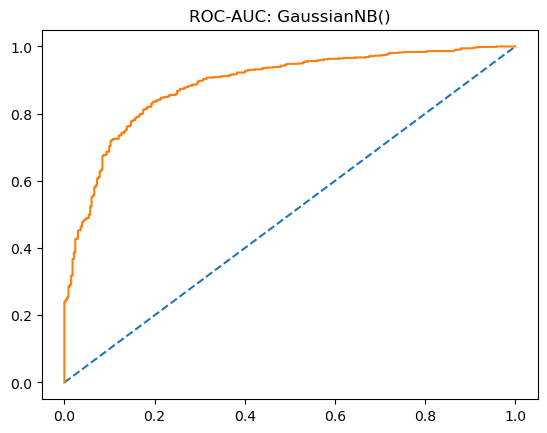

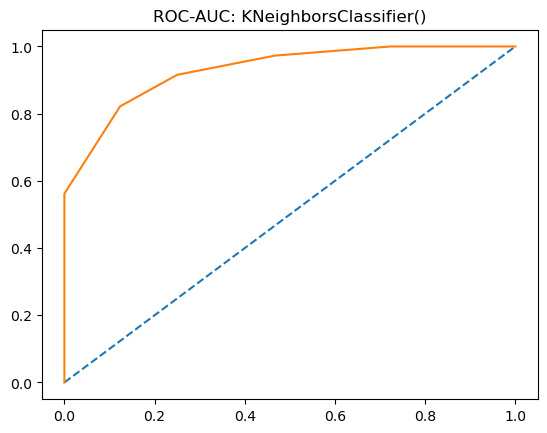

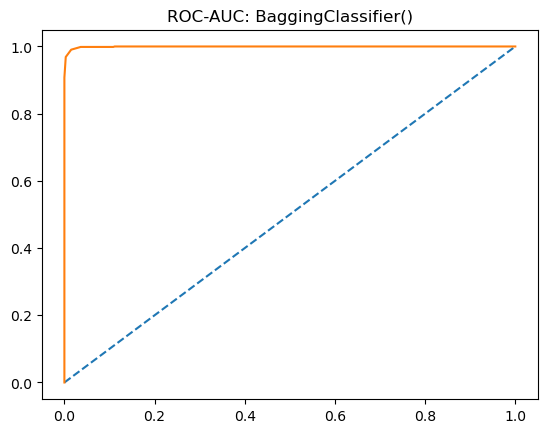

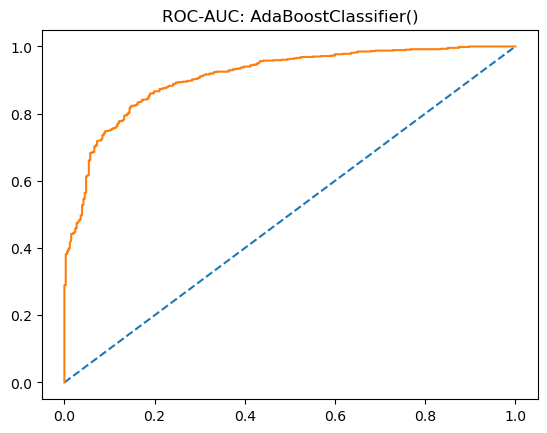

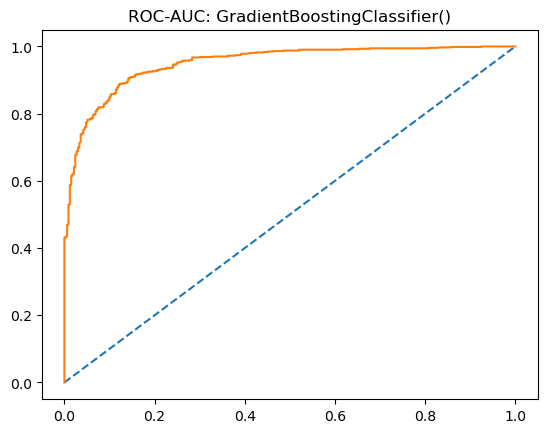

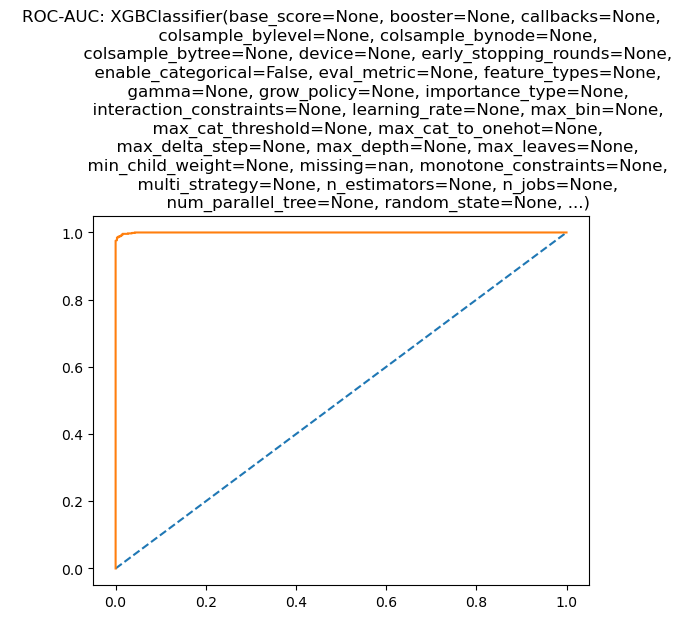

In [43]:
for i in model:
    # predict probabilities
    probs = i.predict_proba(X_train)[:,1]
    # keep probabilities for the positive outcome only
    #probs = probs[:, 1]
    # calculate AUC
    plt.figure()
    auc = roc_auc_score(Y_train, probs)
    plt.title(f'ROC-AUC: {i}')
    print(f'AUC : %.3f {i}' % auc)
    #plt.figure()
    #plt.plot(train_fpr, train_tpr, label=f'model: {type(model).__name__}')
    # calculate roc curve
    train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # plot the roc curve for the model
    plt.plot(train_fpr, train_tpr);

#### 1.4.3.2 ROC-AUC Test data

AUC : 0.885 GaussianNB()
AUC : 0.869 KNeighborsClassifier()
AUC : 0.845 BaggingClassifier()
AUC : 0.880 AdaBoostClassifier()
AUC : 0.904 GradientBoostingClassifier()
AUC : 0.863 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


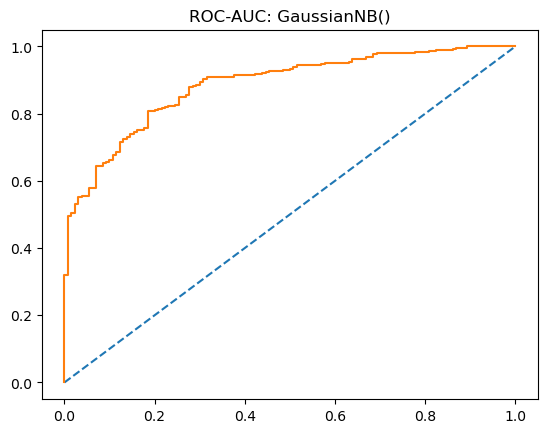

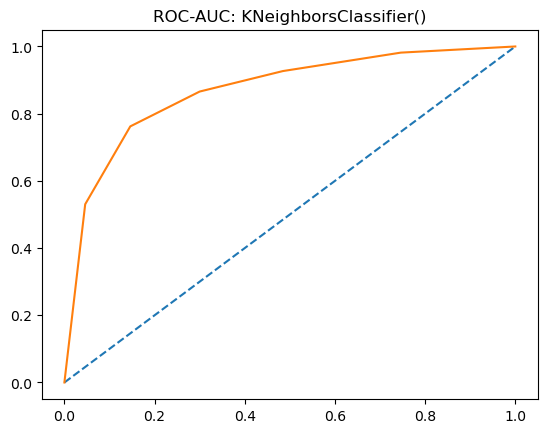

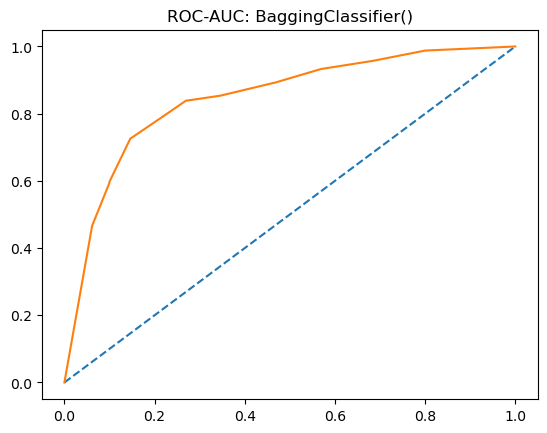

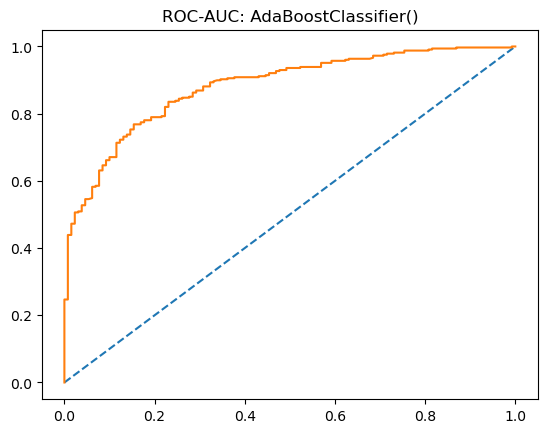

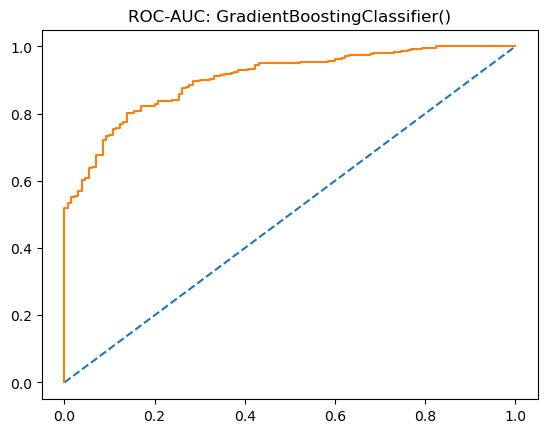

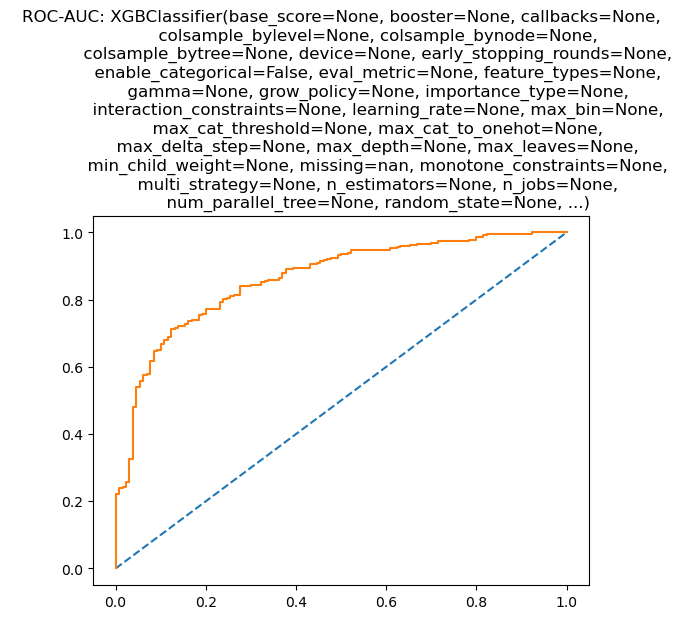

In [44]:
for i in model:
    # predict probabilities
    probs = i.predict_proba(X_test)[:,1]
    # keep probabilities for the positive outcome only
    #probs = probs[:, 1]
    # calculate AUC
    plt.figure()
    auc = roc_auc_score(Y_test, probs)
    plt.title(f'ROC-AUC: {i}')
    print(f'AUC : %.3f {i}' % auc)
    #plt.figure()
    #plt.plot(train_fpr, train_tpr, label=f'model: {type(model).__name__}')
    # calculate roc curve
    test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # plot the roc curve for the model
    plt.plot(test_fpr, test_tpr);

### 1.4.4 Comment on all the model performance

#### Naive Bayes:

The recall difference the train(0.88) and test(0.86) data is 0.02. Which is one of the best model in terms of lesser recall difference. 
The F1 score difference is 0.01. 
45 labour votes are identified as conservative (0.16)
The AUC score difference is 0.002


#### KNN Classifier 

The recall difference the train(0.88) and test(0.92) data is 0.04. 
The F1 score difference is 0.03. 
44 labour votes are identified as conservative(0.16)
The AUC score difference is 0.061


#### Bagging 

The recall difference the train(0.99) and test(0.86) data is 0.13. 
The F1 score difference is 0.04. 
52 labour votes are identified as conservative(0.19)
The AUC score difference is 0.154


#### AdaBoosting

The recall difference the train(0.90) and test(0.88) data is 0.02. Which is one of the best model in terms of lesser recall difference. 
The F1 score difference is 0.04. 
41 labour votes are identified as conservative(0.14)
The AUC score difference is 0.065


#### Gradient Boosting

The recall difference the train(0.93) and test(0.87) data is 0.06. 
The F1 score difference is 0.04. 
43 labour votes are identified as conservative(0.15)
The AUC score difference is 0.046


#### XG Boosting

The recall difference the train(1.0) and test(0.85) data is 0.15. 
The F1 score difference is 0.13. 
50 labour votes are identified as conservative(0.18)
The AUC score difference is 0.137

## 1.5 Model Performance improvement

### 1.5.1 Improve the model performance of bagging and boosting models by tuning the model

#### 1.5.1.1 Hypertuning - Bagging

In [45]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Choose the type of classifier. 

BGCL_tuned=BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": [10,20,30],
    "max_samples" : [0.5, 0.7, 0.9],
    "max_features": [0.5, 0.7, 0.9],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(BGCL_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
BGCL_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
BGCL_tuned.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                  max_features=0.7, max_samples=0.7, n_estimators=20,
                  random_state=1)

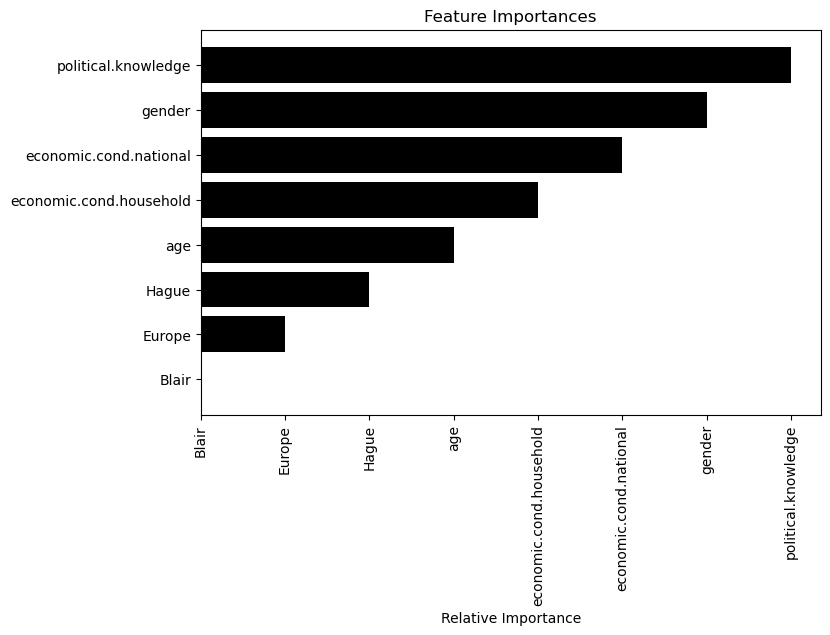

In [46]:
importances = BGCL_tuned.feature_names_in_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.xticks(rotation=90)
plt.show()

#### 1.5.1.2 Hypertuning - AdaBoosting

In [47]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# Choose the type of classifier. 
ABCL_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(1,20,1),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ABCL_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
ABCL_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ABCL_tuned.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=5, random_state=1)

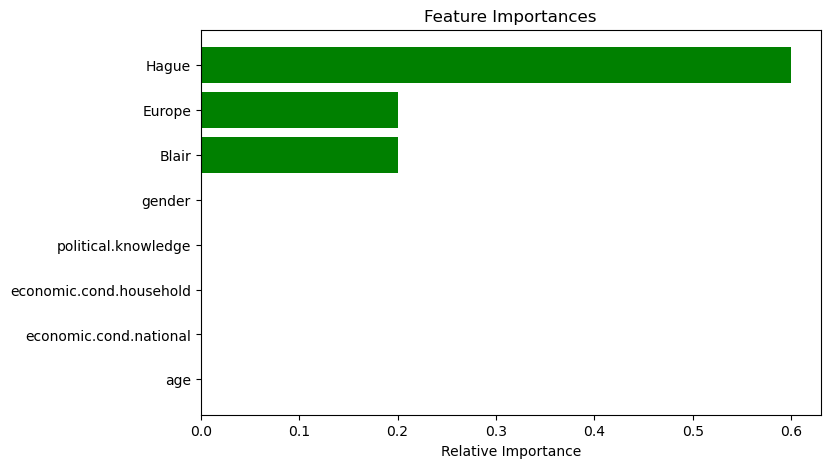

In [48]:
importances = ABCL_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### 1.5.1.3 Hypertuning - Gradient Boosting

In [49]:
# Choose the type of classifier. 
GBCL_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [20,50,70,100,150],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(GBCL_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
GBCL_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
GBCL_tuned.fit(X_train, Y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, n_estimators=20, random_state=1,
                           subsample=0.8)

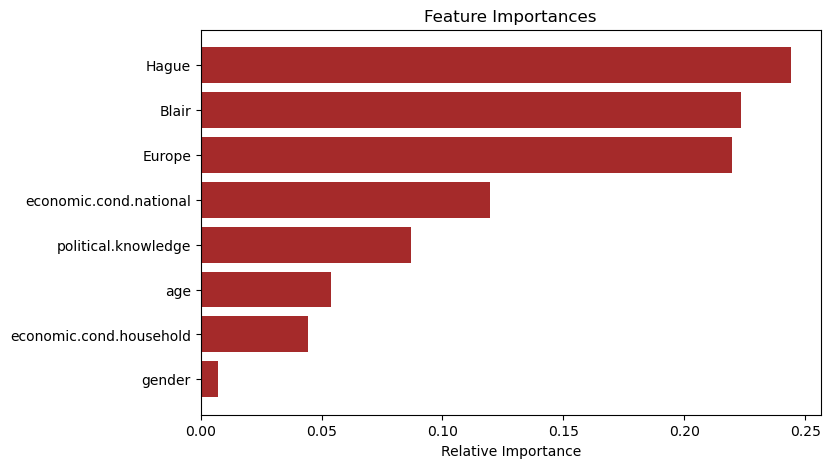

In [50]:
importances = GBCL_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='brown', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### 1.5.1.4 Hypertuning - XG Boosting

In [51]:
# Choose the type of classifier. 
XGBCL_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [10,20],
    "scale_pos_weight":[0,1,2,4],
    "subsample":[0.5,0.7,0.9],
    "learning_rate":[0.01,0.1,0.2],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(XGBCL_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
XGBCL_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
XGBCL_tuned.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

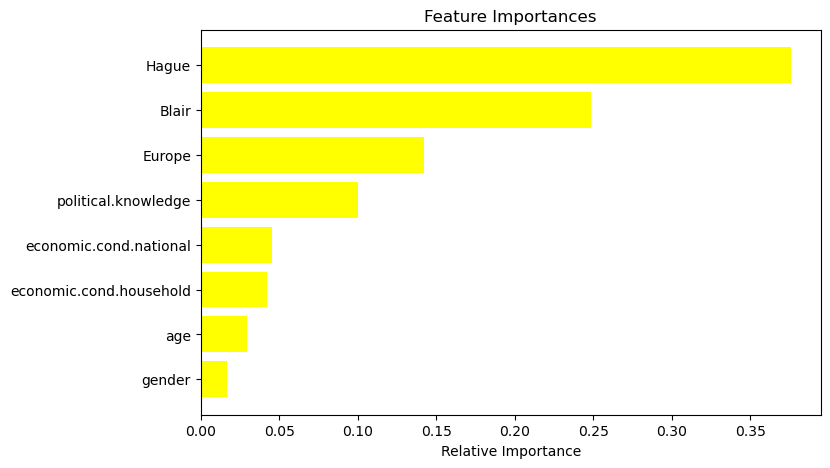

In [52]:
importances = XGBCL_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [53]:

model1=[BGCL_tuned,ABCL_tuned,GBCL_tuned,XGBCL_tuned]


precision_train=[]
precision_test=[]

recall_train=[]
recall_test=[]

f1_train=[]
f1_test=[]

accuracy_train=[]
accuracy_test=[]



for i in model1:
    i.fit(X_train,Y_train)
    
    precision_train.append(round(precision_score(Y_train,i.predict(X_train)),2))
    precision_test.append(round(precision_score(Y_test,i.predict(X_test)),2))
    
    recall_train.append(round(recall_score(Y_train,i.predict(X_train)),2))
    recall_test.append(round(recall_score(Y_test,i.predict(X_test)),2))
    
    f1_train.append(round(f1_score(Y_train,i.predict(X_train)),2))
    f1_test.append(round(f1_score(Y_test,i.predict(X_test)),2))
    
    accuracy_train.append(round(accuracy_score(Y_train,i.predict(X_train)),2))
    accuracy_test.append(round(accuracy_score(Y_test,i.predict(X_test)),2))
        
        
pd.DataFrame({'Train Precision': precision_train,'Test Precision': precision_test,
                   'Train Recall': recall_train,'Test Recall': recall_test,
                   'Train F1_score': f1_train,'Test F1_score': f1_test,
                   'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Bagging','AdaBoosting Tuned','Gradient Boosting Tuned', 'XG Boosting Tuned'])

,Train Precision,Test Precision,Train Recall,Test Recall,Train F1_score,Test F1_score,Train Accuracy,Test Accuracy
Bagging,0.78,0.82,0.95,0.95,0.86,0.88,0.79,0.81
AdaBoosting Tuned,0.78,0.81,0.96,0.96,0.86,0.88,0.78,0.81
Gradient Boosting Tuned,0.83,0.84,0.96,0.92,0.89,0.88,0.84,0.82
XG Boosting Tuned,0.69,0.72,1.00,1.00,0.82,0.83,0.69,0.72


### 1.5.2 Comment on the model performance improvement on training and test data

#### Bagging:

The recall for train decreased from  0.99 to 0.95 and test increased from 0.86 to 0.95 and the recall difference for the train & test is 0.00 but before tuning it was 0.02. The hyperparameter tuning for Bagging increased the model performance 
 

#### AdaBoosting:

The recall for train increased from  0.90 to 0.96 and test increased from 0.88 to 0.96 and the recall difference for the train & test is 0.00 but before tuning it was 0.02. The hyperparameter tuning for AdaBoosting increased the model performance


#### Gradient Boosting:

The recall for train increased from  0.93 to 0.96 and test increased from 0.87 to 0.92 and the recall difference for the train & test is 0.06 but before tuning it was 0.05. The hyperparameter tuning for Gradient Boosting does not show significant improvement in the model performance


#### XG Boosting:

The recall for train remain same as 1.00 and test increased from 0.85 to 1.00 and the recall difference for the train & test is 0.00 but before tuning it was 0.15. The hyperparameter tuning for XG Boosting increased the model performance

## 1.6 Final Model Selection

### 1.6.1 Compare all the model built so far

In [54]:
model2=[NB,KNN,BGCL,BGCL_tuned,ABCL,ABCL_tuned,GBCL,GBCL_tuned,XGBCL,XGBCL_tuned]


precision_train=[]
precision_test=[]

recall_train=[]
recall_test=[]

f1_train=[]
f1_test=[]

accuracy_train=[]
accuracy_test=[]



for i in model2:
    i.fit(X_train,Y_train)
    
    precision_train.append(round(precision_score(Y_train,i.predict(X_train)),2))
    precision_test.append(round(precision_score(Y_test,i.predict(X_test)),2))
    
    recall_train.append(round(recall_score(Y_train,i.predict(X_train)),2))
    recall_test.append(round(recall_score(Y_test,i.predict(X_test)),2))
    
    f1_train.append(round(f1_score(Y_train,i.predict(X_train)),2))
    f1_test.append(round(f1_score(Y_test,i.predict(X_test)),2))
    
    accuracy_train.append(round(accuracy_score(Y_train,i.predict(X_train)),2))
    accuracy_test.append(round(accuracy_score(Y_test,i.predict(X_test)),2))
        
        
pd.DataFrame({'Train Precision': precision_train,'Test Precision': precision_test,
                   'Train Recall': recall_train,'Test Recall': recall_test,
                   'Train F1_score': f1_train,'Test F1_score': f1_test,
                   'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Naive Bayes','KNN Classifier',
                   'Bagging','Bagging Tuned',
                   'AdaBoosting','AdaBoosting Tuned',
                   'Gradient Boosting','Gradient Boosting Tuned', 
                   'XG Boosting','XG Boosting Tuned'])

,Train Precision,Test Precision,Train Recall,Test Recall,Train F1_score,Test F1_score,Train Accuracy,Test Accuracy
Naive Bayes,0.88,0.89,0.88,0.86,0.88,0.87,0.83,0.82
KNN Classifier,0.89,0.88,0.92,0.87,0.90,0.87,0.86,0.82
Bagging,1.00,0.88,0.99,0.84,0.99,0.86,0.99,0.81
Bagging Tuned,0.78,0.82,0.95,0.95,0.86,0.88,0.79,0.81
AdaBoosting,0.87,0.88,0.90,0.88,0.89,0.88,0.84,0.82
AdaBoosting Tuned,0.78,0.81,0.96,0.96,0.86,0.88,0.78,0.81
Gradient Boosting,0.91,0.89,0.93,0.87,0.92,0.88,0.89,0.83
Gradient Boosting Tuned,0.83,0.84,0.96,0.92,0.89,0.88,0.84,0.82
XG Boosting,0.99,0.87,1.00,0.85,0.99,0.86,0.99,0.80
XG Boosting Tuned,0.69,0.72,1.00,1.00,0.82,0.83,0.69,0.72


### 1.6.2 Select the final model with the proper justification

In [55]:
    print(f"Confusion Matrix for XGBCL_tuned:\n")
    print(confusion_matrix(Y_test, XGBCL_tuned.predict(X_test)))
    print("\n")
 
    #print(f"Classification Report for XGBCL_tuned: Train Data\n")
    #print(classification_report(Y_train, XGBCL_tuned.predict(X_train)))
    #print("\n")
    
    print(f"Classification Report for XGBCL_tuned: Test Data\n")
    print(classification_report(Y_test, XGBCL_tuned.predict(X_test)))
    print("\n")

Confusion Matrix for XGBCL_tuned:

[[  0 130]
 [  0 328]]


Classification Report for XGBCL_tuned: Test Data

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.72      1.00      0.83       328

    accuracy                           0.72       458
   macro avg       0.36      0.50      0.42       458
weighted avg       0.51      0.72      0.60       458





#### XG Boosting Tuned:


##### Before Tuning:

The recall difference between the train(1.00) and test(0.85) data is 0.15. 
The F1 score difference is 0.13. 
50 labour votes are identified as conservative(0.18)
The AUC score difference is 0.137


##### After Tuning:

The recall for train remain same as 1.00 and test increased from 0.85 to 1.00 and the recall difference for the train & test is 0.00 but before tuning it was 0.15. The hyperparameter tuning for XG Boosting increased the model performance significantly

### 1.6.3 Check the most important features in the final model and draw inferences

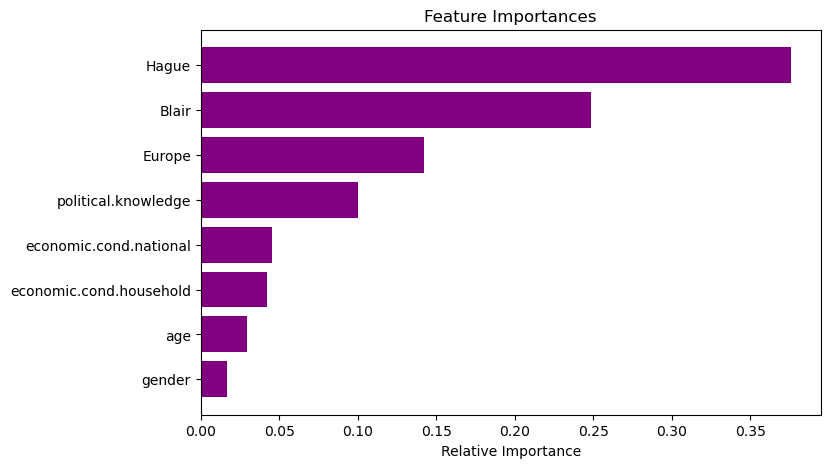

In [56]:
importances = XGBCL_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 1.7 Actionable Insights & Recommendations

### 1.7.1 Compare all four models

In [57]:
model2=[NB,KNN,BGCL_tuned,ABCL_tuned,GBCL_tuned,XGBCL_tuned]


precision_train=[]
precision_test=[]

recall_train=[]
recall_test=[]

f1_train=[]
f1_test=[]

accuracy_train=[]
accuracy_test=[]



for i in model2:
    i.fit(X_train,Y_train)
    
    precision_train.append(round(precision_score(Y_train,i.predict(X_train)),2))
    precision_test.append(round(precision_score(Y_test,i.predict(X_test)),2))
    
    recall_train.append(round(recall_score(Y_train,i.predict(X_train)),2))
    recall_test.append(round(recall_score(Y_test,i.predict(X_test)),2))
    
    f1_train.append(round(f1_score(Y_train,i.predict(X_train)),2))
    f1_test.append(round(f1_score(Y_test,i.predict(X_test)),2))
    
    accuracy_train.append(round(accuracy_score(Y_train,i.predict(X_train)),2))
    accuracy_test.append(round(accuracy_score(Y_test,i.predict(X_test)),2))
        
        
pd.DataFrame({'Train Precision': precision_train,'Test Precision': precision_test,
                   'Train Recall': recall_train,'Test Recall': recall_test,
                   'Train F1_score': f1_train,'Test F1_score': f1_test,
                   'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Naive Bayes','KNN Classifier',
                   'Bagging Tuned',
                   'AdaBoosting Tuned',
                   'Gradient Boosting Tuned', 
                   'XG Boosting Tuned'])

,Train Precision,Test Precision,Train Recall,Test Recall,Train F1_score,Test F1_score,Train Accuracy,Test Accuracy
Naive Bayes,0.88,0.89,0.88,0.86,0.88,0.87,0.83,0.82
KNN Classifier,0.89,0.88,0.92,0.87,0.90,0.87,0.86,0.82
Bagging Tuned,0.78,0.82,0.95,0.95,0.86,0.88,0.79,0.81
AdaBoosting Tuned,0.78,0.81,0.96,0.96,0.86,0.88,0.78,0.81
Gradient Boosting Tuned,0.83,0.84,0.96,0.92,0.89,0.88,0.84,0.82
XG Boosting Tuned,0.69,0.72,1.00,1.00,0.82,0.83,0.69,0.72


### 1.7.2 Conclude with the key takeaways for the business

# Problem 2

## 2.1 Define the problem and Perform Exploratory Data Analysis

### 2.1.1 Problem Definition

### 2.1.2 Find the number of Character, words & sentences in all three speeches

In [58]:
import nltk
import re

In [59]:
text=pd.read_excel('Project_Speech.xlsx')
text

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [60]:
text['Characters'] = text['Speech'].str.len()
text[['Speech','Characters']].head()

,Speech,Characters
0,On each national day of inauguration since 178...,7651
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106


In [61]:
text['totalwords'] = [len(x.split()) for x in text['Speech'].tolist()]
text[['Speech','totalwords']].head()

,Speech,totalwords
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


In [62]:
text['sentences'] = [len(x.split(".")) for x in text['Speech'].tolist()]
text[['Speech','sentences']].head()

,Speech,sentences
0,On each national day of inauguration since 178...,69
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",56
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",70


In [63]:
text['Characters'] = text['Speech'].str.len()
text['Words'] = [len(x.split()) for x in text['Speech'].tolist()]
text['Sentences'] = [len(x.split(".")) for x in text['Speech'].tolist()]
text[['Speech','Characters','Words','Sentences']].head()

,Speech,Characters,Words,Sentences
0,On each national day of inauguration since 178...,7651,1323,69
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673,1364,56
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106,1769,70


## 2.2 Text cleaning

In [64]:
text['Proc_text'] = text['Speech'].str.replace('[^a-z\s]','')
text[['Name','Speech','Proc_text']].head()

,Name,Speech,Proc_text
0,Roosevelt,On each national day of inauguration since 178...,n each national day of inauguration since the...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",ice resident ohnson r peaker r hief ustice res...
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",r ice resident r peaker r hief ustice enator o...


### 2.2.1 Stopword removal

In [65]:
from nltk.corpus import stopwords
stop_words1=stopwords.words('english')
print(stop_words1)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [66]:
# Roosevelt Speech

In [67]:
s1=text['Speech'][0]

In [68]:
s1=re.sub('[^\w\s]','',s1)

In [69]:
s1_words=s1.split()

In [70]:
s1_lower_words = ' '.join([x.lower() for x in s1_words])

In [71]:
s1_words_after_stopwords=[x for x in s1_lower_words.split() if x not in stop_words1]

In [72]:
print(s1_words_after_stopwords)

['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'statesnnin', 'washingtons', 'day', 'task', 'people', 'create', 'weld', 'together', 'nationnnin', 'lincolns', 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'withinnnin', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'withoutnnto', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inactionnnlives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'threescore', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'livennthere', 'men', 'doubt', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny', 'slavery', 'become', 'surging', 'wave', 'futu

In [73]:
# Kennedy Speech

In [74]:
s2=text['Speech'][1]

In [75]:
s2=re.sub('[^\w\s]','',s2)

In [76]:
s2_words=s2.split()

In [77]:
s2_lower_words = ' '.join([x.lower() for x in s2_words])

In [78]:
s2_words_after_stopwords=[x for x in s2_lower_words.split() if x not in stop_words1]

In [79]:
print(s2_words_after_stopwords)

['vice', 'president', 'johnson', 'mr', 'speaker', 'mr', 'chief', 'justice', 'president', 'eisenhower', 'vice', 'president', 'nixon', 'president', 'truman', 'reverend', 'clergy', 'fellow', 'citizens', 'observe', 'today', 'victory', 'party', 'celebration', 'freedom', 'symbolizing', 'end', 'well', 'beginning', 'signifying', 'renewal', 'well', 'change', 'sworn', 'almighty', 'god', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'agonnthe', 'world', 'different', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', 'belief', 'rights', 'man', 'come', 'generosity', 'state', 'hand', 'godnnwe', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', 'let', 'word', 'go', 'forth', 'time', 'place', 'friend', 'foe', 'alike', 'torch', 'passed', 'new', 'generation', 'americans', 'born', 'century', 'tempere

In [80]:
# Nixon Speech

In [81]:
s3=text['Speech'][2]

In [82]:
s3=re.sub('[^\w\s]','',s3)

In [83]:
s3_words=s3.split()

In [84]:
s3_lower_words = ' '.join([x.lower() for x in s3_words])

In [85]:
s3_words_after_stopwords=[x for x in s3_lower_words.split() if x not in stop_words1]

In [86]:
print(s3_words_after_stopwords)

['mr', 'vice', 'president', 'mr', 'speaker', 'mr', 'chief', 'justice', 'senator', 'cook', 'mrs', 'eisenhower', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'togethernnwhen', 'met', 'four', 'years', 'ago', 'america', 'bleak', 'spirit', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'homennas', 'meet', 'today', 'stand', 'threshold', 'new', 'era', 'peace', 'worldnnthe', 'central', 'question', 'us', 'shall', 'use', 'peace', 'let', 'us', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroadnnlet', 'us', 'resolve', 'become', 'time', 'great', 'responsibilities', 'greatly', 'borne', 'renew', 'spirit', 'promise', 'america', 'enter', 'third', 'century', 'nationnnthis', 'past', 'year', 'saw', 'farreaching', 'results', 'new', 'policies', 'peace', 'continuing', 'revitalize', 'traditional', 'friendships', 'missions', 'peking', 'moscow', 'a

### 2.2.2 Stemming

In [87]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/srinivasant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/srinivasant/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [89]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
s1_words_after_stemmer = [st.stem(i) for i in s1_words_after_stopwords]

In [90]:
print(s1_words_after_stemmer)

['nation', 'day', 'inaugur', 'sinc', '1789', 'peopl', 'renew', 'sens', 'dedic', 'unit', 'statesnnin', 'washington', 'day', 'task', 'peopl', 'creat', 'weld', 'togeth', 'nationnnin', 'lincoln', 'day', 'task', 'peopl', 'preserv', 'nation', 'disrupt', 'withinnnin', 'day', 'task', 'peopl', 'save', 'nation', 'institut', 'disrupt', 'withoutnnto', 'us', 'come', 'time', 'midst', 'swift', 'happen', 'paus', 'moment', 'take', 'stock', 'recal', 'place', 'histori', 'rediscov', 'may', 'risk', 'real', 'peril', 'inactionnnl', 'nation', 'determin', 'count', 'year', 'lifetim', 'human', 'spirit', 'life', 'man', 'threescor', 'year', 'ten', 'littl', 'littl', 'less', 'life', 'nation', 'full', 'measur', 'livennther', 'men', 'doubt', 'men', 'believ', 'democraci', 'form', 'govern', 'frame', 'life', 'limit', 'measur', 'kind', 'mystic', 'artifici', 'fate', 'unexplain', 'reason', 'tyranni', 'slaveri', 'becom', 'surg', 'wave', 'futur', 'freedom', 'eb', 'tidennbut', 'american', 'know', 'truenneight', 'year', 'ago', 

In [91]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
s2_words_after_stemmer = [st.stem(i) for i in s2_words_after_stopwords]

In [92]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
s3_words_after_stemmer = [st.stem(i) for i in s3_words_after_stopwords]

### 2.2.3 Find the 3 most common words used in all three speeches

In [93]:
print('The most common words used in Roosevelt speech are',nltk.FreqDist(s1_words_after_stemmer).most_common(3))

The most common words used in Roosevelt speech are [('nation', 16), ('know', 10), ('peopl', 8)]


In [94]:
print('The most common words used in Kennedy speech are',nltk.FreqDist(s2_words_after_stemmer).most_common(3))

The most common words used in Kennedy speech are [('let', 11), ('us', 11), ('power', 9)]


In [95]:
print('The most common words used in Nixon speech are',nltk.FreqDist(s3_words_after_stemmer).most_common(3))

The most common words used in Nixon speech are [('us', 26), ('america', 19), ('respons', 16)]


## 2.3 Plot Word cloud of all three speeches

### 2.3.1 Show the most common words used in all three speeches in the form of word clouds

In [96]:
## Creating WordCloud
!pip install wordcloud

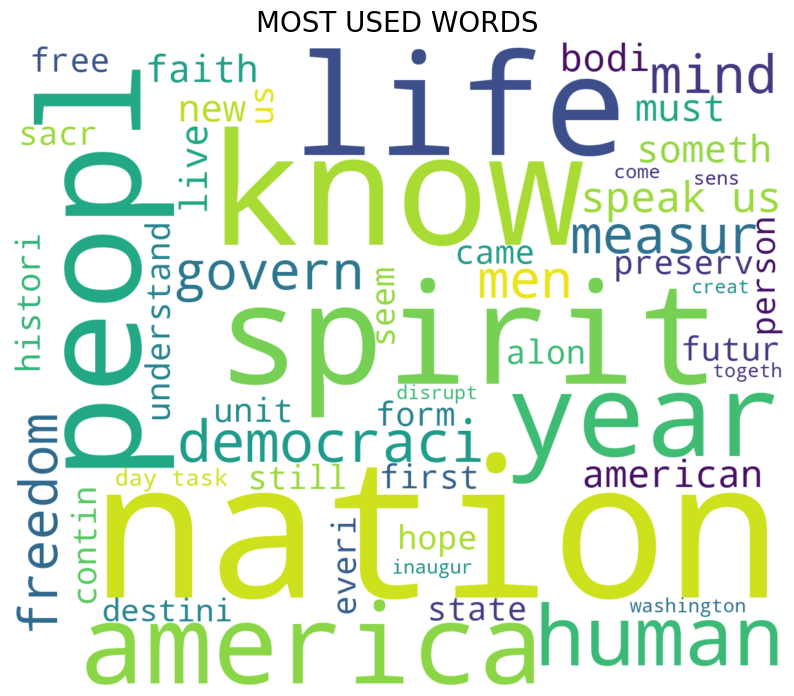

In [97]:
from wordcloud import WordCloud, STOPWORDS

new_words = set(STOPWORDS) #set function removes the duplicates
new_words.update (['u', 'seek' , 'let', 'le'])

plt.subplots(figsize=(10,10))
wordcloud = WordCloud (background_color='white', max_words=50,
                       width=1200, stopwords=new_words,
                       height=1000).generate(" ".join (s1_words_after_stemmer))
plt.title("MOST USED WORDS", fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis ('off')
plt.show()

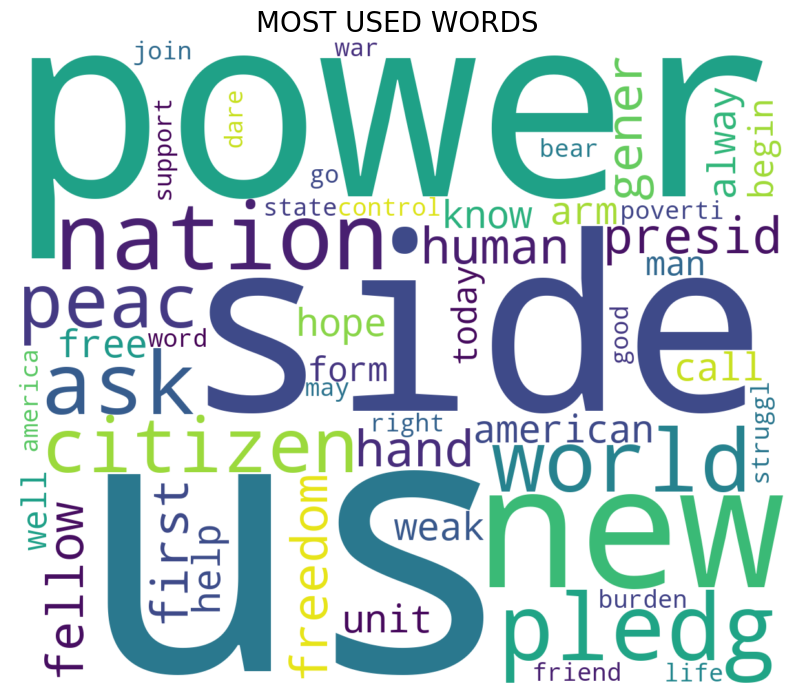

In [98]:
from wordcloud import WordCloud, STOPWORDS

new_words = set(STOPWORDS) #set function removes the duplicates
new_words.update (['u', 'seek' , 'let', 'le'])

plt.subplots(figsize=(10,10))
wordcloud = WordCloud (background_color='white', max_words=50,
                       width=1200, stopwords=new_words,
                       height=1000).generate(" ".join (s2_words_after_stemmer))
plt.title("MOST USED WORDS", fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis ('off')
plt.show()

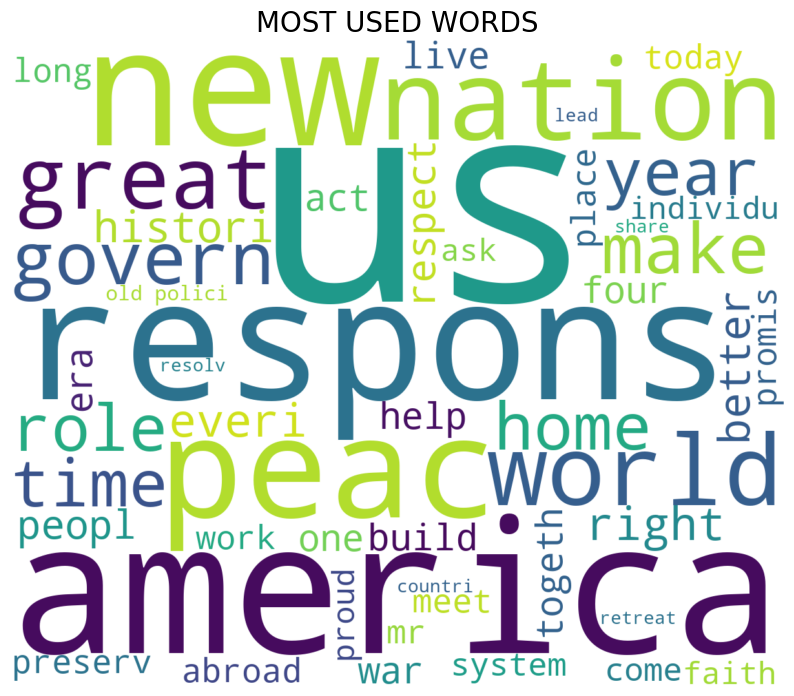

In [99]:
from wordcloud import WordCloud, STOPWORDS

new_words = set(STOPWORDS) #set function removes the duplicates
new_words.update (['u', 'seek' , 'let', 'le'])

plt.subplots(figsize=(10,10))
wordcloud = WordCloud (background_color='white', max_words=50,
                       width=1200, stopwords=new_words,
                       height=1000).generate(" ".join (s3_words_after_stemmer))
plt.title("MOST USED WORDS", fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis ('off')
plt.show()